<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [1]:
import glob
import pickle
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split

In [2]:
train_data = pd.read_csv("C:\\Kaggle competetion datasets\\Elo Merchent Category Recommendation\\Elo Original Data\\train.csv")

In [3]:
# Binning the numeric variable to different categories

target_std=train_data['target'].std()
max_target=train_data['target'].max()+1
min_target=train_data['target'].min()-1
bins=[min_target,-3*target_std,-2*target_std,-1*target_std,target_std*1,target_std*2,target_std*3,max_target]
labels=[-4,-3,-2,0,2,3,5]
train_data['target_bin']=pd.cut(train_data['target'],bins=bins,labels=labels).astype(int)
train_data['target_bin']=train_data['target_bin'].abs()
train_data.groupby(['target_bin']).size()

target_bin
0    191093
2      8200
3       363
4      2237
5        24
dtype: int64

In [5]:
train_data.tail()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,target_bin
201912,2017-09,C_ID_963962de2c,3,2,1,-2.740821,0
201913,2015-10,C_ID_1314773c0b,3,1,1,0.312917,0
201914,2017-08,C_ID_7666735b3d,4,3,0,0.093494,0
201915,2016-07,C_ID_73f5a0efd0,3,2,1,-4.676589,2
201916,2017-07,C_ID_92c9984c58,3,1,1,-1.859413,0


In [6]:
def run_lgb(train_X, train_y, val_X, val_y):
    param = {'num_leaves': 30,
             'min_data_in_leaf': 30,
             'objective': 'regression',
             'max_depth': 9,
             'learning_rate': 0.01,
             "boosting": "gbdt",
             "feature_fraction": 0.7,
             "bagging_freq": 5,
             "bagging_fraction": 0.7,
             "bagging_seed": 11,
             "metric": 'rmse',
             # "lambda_l1": 0.2634,
             "random_state": 133,
             "verbosity": -1}

    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    evals_result = {}
    model = lgb.train(param, lgtrain, 2000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=100,
                      evals_result=evals_result)
    return model, evals_result


In [7]:
def join_datasets(filepath, train_data1):
    for file in filepath:
        print(file)
        data_features = pd.read_csv(file)
        train_data1=pd.merge(train_data1,data_features,how='left',on='card_id')
    output_feature=['target']
    input_features=[x for x in train_data1.columns if x not in ['first_active_month', 'card_id','target','target_bin','month_max_x']]
    train_X = train_data1[input_features]
#     train_X = train_data1#[input_features]
    train_y = train_data1[output_feature]
    X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_data1['target_bin'], test_size=0.2, random_state=1000)
#     return(X_train, X_valid, y_train, y_valid)
#     # random state:42
    # random state: 100
    # random state: 892
    y_train1=train_y.loc[y_train.index,:]
    y_valid1=train_y.loc[y_valid.index,:]
    return X_train,y_train1, X_valid, y_valid1
#     model, evals_result = run_lgb(X_train,y_train1, X_valid, y_valid1)
#     return(model, evals_result)

In [10]:
path = "C:\\Kaggle competetion datasets\\Elo Merchent Category Recommendation\\Elo Feb 18th\\faetures_feb18th"

#### Attempt12

In [9]:
filelist12=['../Fresh\\active_first_diff.csv', '../Fresh\\card_new_mercid.csv', 
            '../Fresh\\card_summary_future.csv', '../Fresh\\card_summary_history.csv', 
            '../Fresh\\category1_allN.csv', '../Fresh\\category1_allY.csv', '../Fresh\\category2_all0.0.csv', '../Fresh\\category2_all1.0.csv', '../Fresh\\category2_all2.0.csv', '../Fresh\\category2_all3.0.csv', '../Fresh\\category2_all4.0.csv', '../Fresh\\category2_all5.0.csv', '../Fresh\\category3_allA.csv', '../Fresh\\category3_allB.csv', '../Fresh\\category3_allC.csv', '../Fresh\\diffhistfuture.csv', '../Fresh\\future_length.csv', '../Fresh\\hist_length.csv', '../Fresh\\quarter_purchase_count.csv', '../Fresh\\quarter_purchase_sum.csv', '../Fresh\\ref_first_future.csv', '../Fresh\\ref_last_hist.csv', '../Fresh\\trend.csv']
# pickle.dump( filelist12, open( path, "wb" ) )
print(filelist12)
X_train,y_train1, X_valid, y_valid1 = join_datasets(filelist12,train_data)


['../Fresh\\active_first_diff.csv', '../Fresh\\card_new_mercid.csv', '../Fresh\\card_summary_future.csv', '../Fresh\\card_summary_history.csv', '../Fresh\\category1_allN.csv', '../Fresh\\category1_allY.csv', '../Fresh\\category2_all0.0.csv', '../Fresh\\category2_all1.0.csv', '../Fresh\\category2_all2.0.csv', '../Fresh\\category2_all3.0.csv', '../Fresh\\category2_all4.0.csv', '../Fresh\\category2_all5.0.csv', '../Fresh\\category3_allA.csv', '../Fresh\\category3_allB.csv', '../Fresh\\category3_allC.csv', '../Fresh\\diffhistfuture.csv', '../Fresh\\future_length.csv', '../Fresh\\hist_length.csv', '../Fresh\\quarter_purchase_count.csv', '../Fresh\\quarter_purchase_sum.csv', '../Fresh\\ref_first_future.csv', '../Fresh\\ref_last_hist.csv', '../Fresh\\trend.csv']
../Fresh\active_first_diff.csv


FileNotFoundError: File b'../Fresh\\active_first_diff.csv' does not exist

In [ ]:
X_train_c=X_train.drop(['year_nunique_y','month_max_y'],axis=1)
X_valid_c=X_valid.drop(['year_nunique_y','month_max_y'],axis=1)
model, evals_result=run_lgb(X_train_c,y_train1, X_valid_c, y_valid1)
%matplotlib inline 
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,10))
lgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=15)
plt.show()

Training until validation scores don't improve for 100 rounds.


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 3.8231
[200]	valid_0's rmse: 3.79964
[300]	valid_0's rmse: 3.78869
[400]	valid_0's rmse: 3.78381
[500]	valid_0's rmse: 3.78037
[600]	valid_0's rmse: 3.77829
[700]	valid_0's rmse: 3.77658
[800]	valid_0's rmse: 3.7755
[900]	valid_0's rmse: 3.7747
[1000]	valid_0's rmse: 3.77416
[1100]	valid_0's rmse: 3.77387
[1200]	valid_0's rmse: 3.77345
[1300]	valid_0's rmse: 3.77317
[1400]	valid_0's rmse: 3.77314
Early stopping, best iteration is:
[1319]	valid_0's rmse: 3.77309


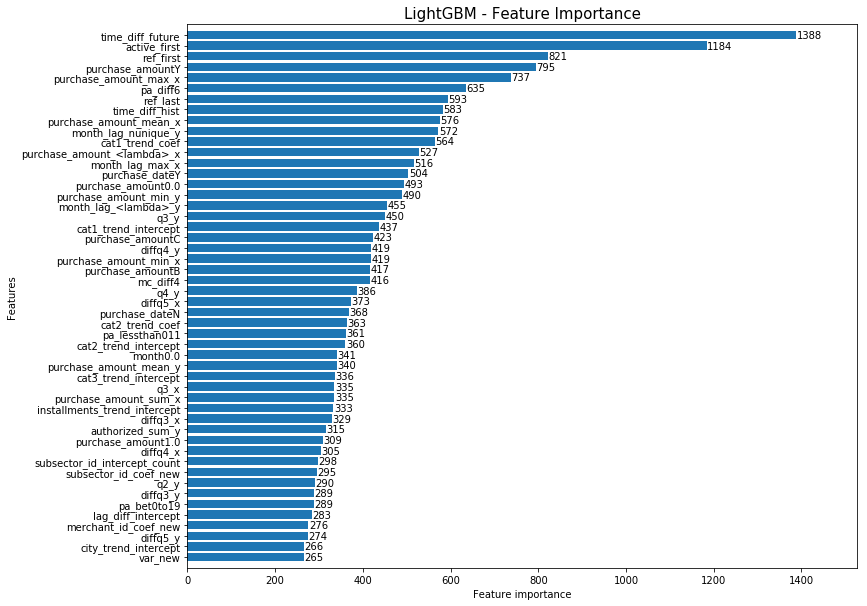

In [31]:
X_train_c=X_train.drop(['year_nunique_y','month_max_y'],axis=1)
X_valid_c=X_valid.drop(['year_nunique_y','month_max_y'],axis=1)
model, evals_result=run_lgb(X_train_c,y_train1, X_valid_c, y_valid1)
%matplotlib inline 
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,10))
lgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=15)
plt.show()

In [ ]:
X_train_c=X_train.drop(['year_nunique_y'],axis=1)
X_valid_c=X_valid.drop(['year_nunique_y'],axis=1)
model, evals_result=run_lgb(X_train_c,y_train1, X_valid_c, y_valid1)
%matplotlib inline 
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,10))
lgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=15)
plt.show()

In [8]:
testdata = pd.read_csv("../data/test.csv")

In [9]:
def testrun(filepath, train_data1):
    for file in filepath:
        print(file)
        data_features = pd.read_csv(file)
        train_data1=pd.merge(train_data1,data_features,how='left',on='card_id')
    output_feature=['target']
    input_features=[x for x in train_data1.columns if x not in ['first_active_month', 'card_id','target']]
    train_X = train_data1[input_features]
    cardid=train_data1['card_id']
    return train_X,cardid

In [10]:
testdata_merged=testrun(filelist12,testdata)

../Fresh\active_first_diff.csv
../Fresh\card_new_mercid.csv
../Fresh\card_summary_future.csv
../Fresh\card_summary_history.csv
../Fresh\category1_allN.csv
../Fresh\category1_allY.csv
../Fresh\category2_all0.0.csv
../Fresh\category2_all1.0.csv
../Fresh\category2_all2.0.csv
../Fresh\category2_all3.0.csv
../Fresh\category2_all4.0.csv
../Fresh\category2_all5.0.csv
../Fresh\category3_allA.csv
../Fresh\category3_allB.csv
../Fresh\category3_allC.csv
../Fresh\diffhistfuture.csv
../Fresh\future_length.csv
../Fresh\hist_length.csv
../Fresh\quarter_purchase_count.csv
../Fresh\quarter_purchase_sum.csv
../Fresh\ref_first_future.csv
../Fresh\ref_last_hist.csv
../Fresh\trend.csv


In [11]:
len(testdata_merged[0])

123623

In [12]:
testdata_merged[0].shape

(123623, 162)

In [13]:
test_results=model.predict(testdata_merged[0],num_iteration=model.best_iteration)

In [14]:
test_results=pd.DataFrame({'card_id':testdata_merged[1],'target':test_results})

In [20]:
testdata_merged[0]['month_max_y'].unique()

array([12,  5,  9,  7,  4,  6, 10,  8, 11,  3,  2], dtype=int64)

In [15]:
test_results['target'].describe()

count    123623.000000
mean         -0.861551
std           0.446313
min          -4.600126
25%          -1.162259
50%          -0.868969
75%          -0.567892
max           1.459484
Name: target, dtype: float64

In [44]:
test_results['target'].describe()

count    123623.000000
mean         -0.588657
std           1.007756
min         -15.215484
25%          -0.673069
50%          -0.395996
75%          -0.137279
max           2.352090
Name: target, dtype: float64

In [19]:
train_data['month_max_y'].describe()

KeyError: 'month_max_y'

datetime.date

In [50]:
test_results.to_csv("../submissions/submission1.csv",index=False)

['../Fresh\\active_first_diff.csv', '../Fresh\\card_new_mercid.csv', '../Fresh\\card_summary_future.csv', '../Fresh\\card_summary_history.csv', '../Fresh\\category1_allN.csv', '../Fresh\\category1_allY.csv', '../Fresh\\category2_all0.0.csv', '../Fresh\\category2_all1.0.csv', '../Fresh\\category2_all2.0.csv', '../Fresh\\category2_all3.0.csv', '../Fresh\\category2_all4.0.csv', '../Fresh\\category2_all5.0.csv', '../Fresh\\category3_allA.csv', '../Fresh\\category3_allB.csv', '../Fresh\\category3_allC.csv', '../Fresh\\diffhistfuture.csv', '../Fresh\\future_length.csv', '../Fresh\\hist_length.csv', '../Fresh\\quarter_purchase_count.csv', '../Fresh\\quarter_purchase_sum.csv', '../Fresh\\ref_first_future.csv', '../Fresh\\ref_last_hist.csv', '../Fresh\\trend.csv']
../Fresh\active_first_diff.csv
../Fresh\card_new_mercid.csv
../Fresh\card_summary_future.csv
../Fresh\card_summary_history.csv
../Fresh\category1_allN.csv
../Fresh\category1_allY.csv
../Fresh\category2_all0.0.csv
../Fresh\category2_al

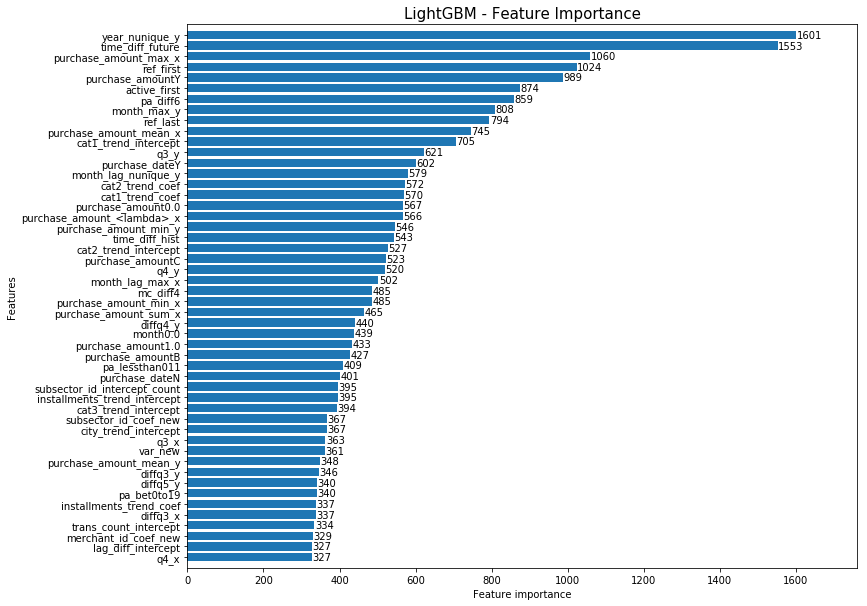

In [6]:
filelist12=['../Fresh\\active_first_diff.csv', '../Fresh\\card_new_mercid.csv', '../Fresh\\card_summary_future.csv', '../Fresh\\card_summary_history.csv', '../Fresh\\category1_allN.csv', '../Fresh\\category1_allY.csv', '../Fresh\\category2_all0.0.csv', '../Fresh\\category2_all1.0.csv', '../Fresh\\category2_all2.0.csv', '../Fresh\\category2_all3.0.csv', '../Fresh\\category2_all4.0.csv', '../Fresh\\category2_all5.0.csv', '../Fresh\\category3_allA.csv', '../Fresh\\category3_allB.csv', '../Fresh\\category3_allC.csv', '../Fresh\\diffhistfuture.csv', '../Fresh\\future_length.csv', '../Fresh\\hist_length.csv', '../Fresh\\quarter_purchase_count.csv', '../Fresh\\quarter_purchase_sum.csv', '../Fresh\\ref_first_future.csv', '../Fresh\\ref_last_hist.csv', '../Fresh\\trend.csv']
# pickle.dump( filelist12, open( "filelist12.p", "wb" ) )
print(filelist12)
model, evals_result=model_run(filelist12,train_data)
%matplotlib inline 
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,10))
lgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=15)
plt.show()